 Auth: Mawaba P. DAO

 03/28/2021

 Florida Institute of Technology
 
 Digital Image Processing: ECE5256 (Dr. Kozaitis)


Proj 7 write up (Wavelet Transforms):
    
         In the first part of this project, we reconstruct wavelets at various sclaes and shifts from adjacent impulses in the Wavelet domain.
         The impulses are placed at locations corresponding to differen scales. The multilevel inverse of the signal is computed and its resolution as well as shift are observed and compared at various scales.
         In the second part, we compare the performance of Fourier and Wavelet transforms in the reconstruction of a signal where most of the information in the Fourier or Wavelet domain has been lost.
    
    

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import pywt
from pywt import wavedec, waverec, array_to_coeffs, dwt, idwt
import numpy as np

# Part 1

Shift = 1


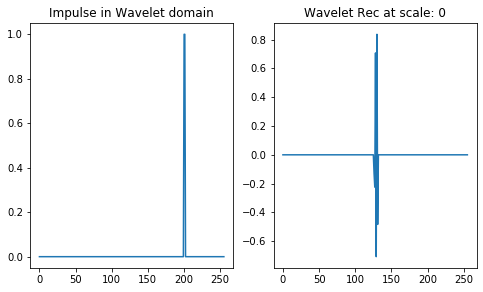

Shift = 2


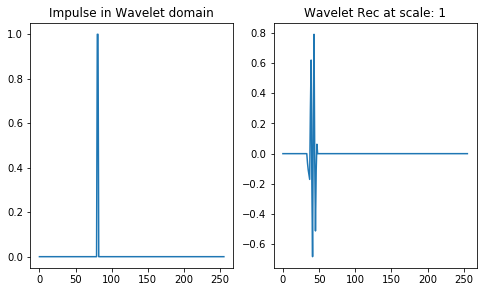

Shift = 4


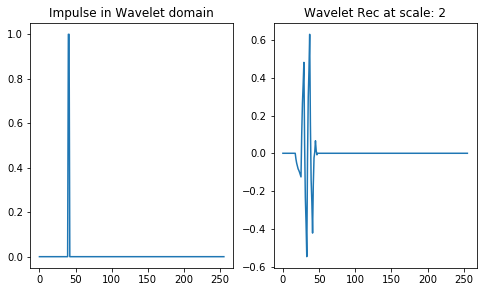

Shift = 8


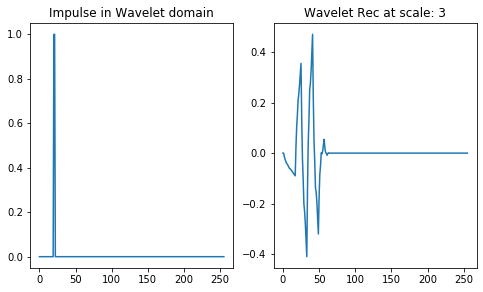

Shift = 32


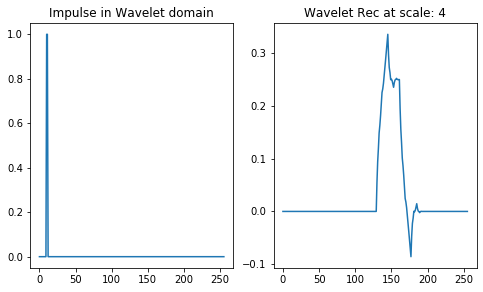

In [22]:
impulse_loc = np.array([200,80,40,20,10])

for i, imp in enumerate(impulse_loc):
    x = signal.unit_impulse(256, [imp, imp+1])
    # Generate how to slice input impulse. 
    coeffs = wavedec(x, wavelet='db2', level=4) 
    arr, coeff_slices = pywt.coeffs_to_array(coeffs)
    #Slice input impulse into wavelet coeffs
    my_coeffs = array_to_coeffs(x, coeff_slices, output_format='wavedec') 
    #Add padding for dimensions to work in reconstruction
    padding = np.zeros((9)) 
    my_coeffs[4] = np.concatenate((my_coeffs[4], padding), axis=0)
    wavelet = waverec(my_coeffs, 'db2')
    print(f"Shift = {np.abs(np.argmax(wavelet) - np.argmin(wavelet))}")
    fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(8, 4.5))
    ax2.set_title(f"Impulse in Wavelet domain")
    ax2.plot(x)
    # ax1.set_title(f"Wavelet Rec at scale: {coeff_slices[4-i]}")
    ax1.set_title(f"Wavelet Rec at scale: {i}")
    ax1.plot(wavelet)
   
    plt.show()

## Part 1 Discussion

In the code above, a signal is generated and adjacent impulses are placed at locations corresponding to scales of interest. Then a reference of how the mapping between signal location and coefficent position is computed using the 'array_to_coeffs' function from pywt. For this to work with the waverec function extra padding must be added to the coefficents corresponding to the 4th level, in order for the number of elements in the input array to match those in the wavelet coefficent matrix.

As the scale increases so does the level of detail of the reconstructed Wavelet, this is expected from the problem description. The Shift is approximated by finding the number of points between the minimum and maximum peaks of the wavelet. This approach is based on intuition and might not be correct which would explain why the shift values do not match does expected from the problem description. However, we can observe that these shift values are powers of 2, and they are increasing as scale increases, which is the expected result.
The incorrect shift values could also be influenced by padding of coefficents performed before reconstructing the Wavelet.

# Part 2

## Generating signal

Text(0.5, 1.0, 'Signal')

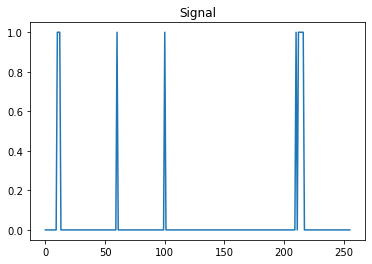

In [5]:
# x = np.linspace(0, 6.5*np.pi, 256)
# y1 = np.sin(x)
# y2 = np.sin(2*x)
# y3 = np.sin(7*x)
# y4 = np.sin(12*x)
# y5 = np.sin(24*x)
# signal = y1 + y2 + y3 + y4 + y5

# plt.plot(signal)
# plt.title("Signal")

sig = signal.unit_impulse(256, [10, 11, 12, 60, 100, 210,212,213,214,215,216])
plt.plot(sig)
plt.title("Signal")



## Fourier Vs Wavelet (75% Data loss)

MSE of WT = 0.06950417745789665
MSE of FT = 0.04465506222310746


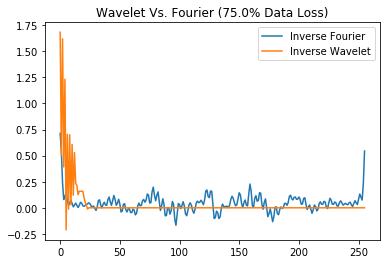

In [21]:
fourierVsWavelet(sig, 0.25)

## Fourier Vs Wavelet (90% Data loss)

MSE of WT = 0.06950417745789665
MSE of FT = 0.04443815771278022


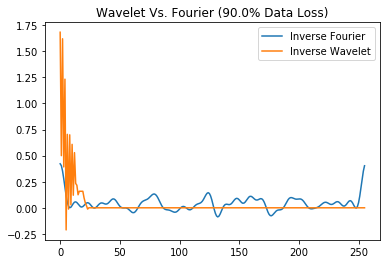

In [20]:
fourierVsWavelet(sig, 0.10)

In [19]:
def fourierVsWavelet(sig, r): #r is the ratio of coefficients to keep
    (cA, cD) = dwt(sig, 'db2')

    cAp = processCoeff(cA, r)
    cDp = processCoeff(cD, r)

    iwsig = idwt(cAp, cDp, 'db2')
    # Do a Fourier transform on the signal
    tsig  = np.fft.fft(sig);
    #Only keep top r% coeffs
    tsigp = processCoeff(tsig, r)
    # Do an inverse Fourier transform on the signal
    itsig = np.fft.ifft(tsigp);
    plt.plot(itsig, label="Inverse Fourier")

    mse_WT = (np.square(sig - iwsig)).mean(axis=None)
    mse_FT = np.absolute((np.square(sig - itsig)).mean(axis=None))
    print(f"MSE of WT = {mse_WT}")
    print(f"MSE of FT = {mse_FT}")

    plt.plot(iwsig, label="Inverse Wavelet")
    plt.legend()
    plt.title(f"Wavelet Vs. Fourier ({(1-r)*100}% Data Loss)")
    plt.show()


In [11]:

def processCoeff(c,r):
    c.sort()
    c = c[::-1] #Reverse
    top_25 = int(c.shape[0]*r)
    c[top_25:] = 0
    return c


## Part 2 Discussion

The result in this part indicates that the inverse Fourier transform of imcomplete coefficients in the frequency domain, has a better performance than its Wavelet equivalent. This result is observed both for the top 25 and top 10% coefficients. This is not the generally expected result as Wavelet transforms are known for their superior data compression capabilities.

This result might be influenced by the generated signal, as well as the type of wavelet used (2nd order Daubechies)

# Wavelet Art

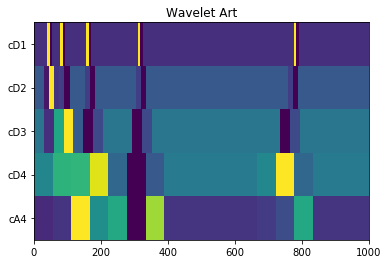

In [14]:
# coeffs = wavedec(imp, 'db2', level=4)
imp = signal.unit_impulse(256, [200,80,40,20,10])
coeffs = wavedec(imp, 'db2', level=4)
x = waverec(coeffs, 'db2')
cA4, cD4, cD3, cD2, cD4 = coeffs
for i, ci in enumerate(coeffs):
    plt.imshow(ci.reshape(1, -1), extent=[0, 1000, i + 0.5, i + 1.5], aspect='auto', interpolation='nearest')

plt.ylim(0.5, len(coeffs) + 0.5) # set the y-lim to include the six horizontal images
# optionally relabel the y-axis (the given labeling is 1,2,3,...)
plt.yticks(range(1, len(coeffs) + 1), ['cA4','cD4', 'cD3', 'cD2', 'cD1'])
plt.title('Wavelet Art')
plt.show()

In [ ]:
# cA4, cD4, cD3, cD2, cD1 = wavedec(sig, wavelet='db2', level=4) 

# cA4p = processCoeff(cA4)
# cD4p = processCoeff(cD4)
# cD3p = processCoeff(cD3)
# cD2p = processCoeff(cD2)
# cD1p = processCoeff(cD1)

# coeffs =  cA4p, cD4p, cD3p, cD2p, cD1p
# true_coeffs = cA4, cD4, cD3, cD2, cD1